In [270]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


In [271]:
data = np.loadtxt('data.dat')

In [272]:
energy_train = data[:1000, 1:41]
label_test = data[:1000,0] -12
energy_val = data[1000:2000, 1:41]
label_val = data[1000:2000,0] -12
energy_test = data[50000:, 1:41]
label_test = data[50000:,0] -12

In [273]:
print(energy_test[0,:])

[   0.      0.      0.      0.      0.      0.      0.   1046.84    0.
    0.      0.      0.      0.      0.      0.      0.      0.   1328.1
    0.      0.      0.      0.      0.      0.      0.      0.      0.
 1493.48    0.      0.      0.      0.      0.      0.      0.      0.
    0.   1399.53    0.      0.  ]


In [274]:
print(label_test)

[4. 3. 4. ... 4. 4. 4.]


In [275]:
energy_train = energy_test / energy_test.max()
energy_val = energy_val / energy_val.max()
energy_test = energy_test / energy_test.max()

In [287]:
model = Sequential()
model.add(Flatten(input_shape=(40,1)))
model.add(Dense(20, activation="relu"))
model.add(Dense(5, activation="softmax"))

In [288]:
model.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_30 (Flatten)            │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 5)              │           105 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 925 (3.61 KB)

 Trainable params: 925 (3.61 KB)

 Non-trainable params: 0 (0.00 B)

In [289]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [290]:
train = model.fit(energy_train, label_train, epochs=1000, validation_data=(energy_val,label_val))

Epoch 1/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0537 - loss: 1.7144 - val_accuracy: 0.5840 - val_loss: 1.3972
Epoch 2/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6641 - loss: 1.3334 - val_accuracy: 0.9620 - val_loss: 1.0923
Epoch 3/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9580 - loss: 1.0377 - val_accuracy: 0.9660 - val_loss: 0.8222
Epoch 4/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.9511 - loss: 0.7714 - val_accuracy: 0.9660 - val_loss: 0.5790
Epoch 5/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.9610 - loss: 0.5357 - val_accuracy: 0.9660 - val_loss: 0.4024
Epoch 6/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.9599 - loss: 0.3807 - val_accuracy: 0.9660 - val_loss: 0.2971
Epoch 7/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.9613 - loss: 0.2961 - val_accuracy: 0.9660 - val_loss: 0.2396
Epoch 8/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.9543 - loss: 0.2685 - val_ac

Text(0.5, 0, 'Epoch')

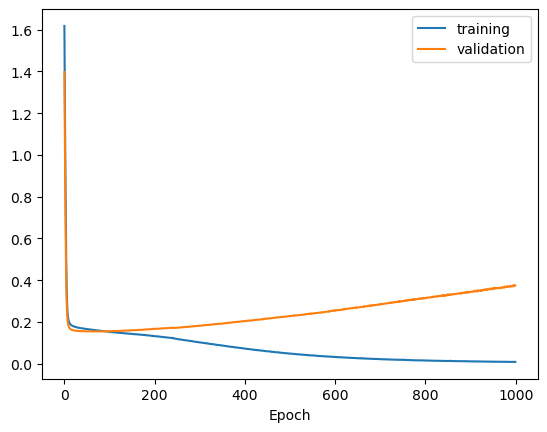

In [292]:
plt.plot(train.epoch, train.history["loss"], label="training")
plt.plot(train.epoch, train.history["val_loss"], label="validation")
plt.legend()
plt.xlabel("Epoch")

In [294]:
test = model.evaluate(energy_test, label_test)

74055/74055 ━━━━━━━━━━━━━━━━━━━━ 17s 234us/step - accuracy: 0.9488 - loss: 0.2738
